In [30]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import train_test_split


# Classification Evaluation

<class 'sklearn.utils.Bunch'>


<IPython.core.display.Javascript object>


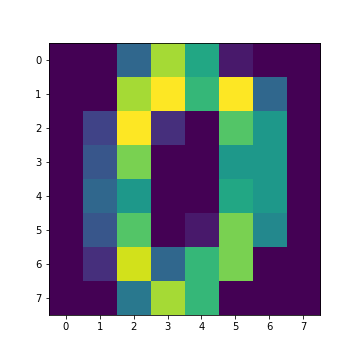

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [31]:
from sklearn.datasets import load_digits
dataset=load_digits()
print(type(dataset))
plt.figure(figsize=(5,5))
plt.imshow(np.array(dataset.images[0]))     
X,y=dataset.data,dataset.target
for class_name,class_count in zip(dataset.target_names,np.bincount(dataset.target)):
    print(class_name,class_count)

# **BINARY-CLASS**

In [32]:
y_binary_imbalanced= [1 if(i==1) else 0 for i in y ]
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [33]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y_binary_imbalanced,random_state=0)
svm=SVC()
svm.fit(X_train,y_train)
svm_prediction=svm.predict(X_test)
svm.score(X_test,y_test)

0.9955555555555555

In [34]:
from sklearn.dummy import DummyClassifier
dummy_model=DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train,y_train)
dummy_prediction=dummy_model.predict(X_test)
dummy_model.score(X_test,y_test)

0.9044444444444445

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_prediction=tree_model.predict(X_test)
tree_model.score(X_test,y_test)

0.9711111111111111

In [36]:
from sklearn.metrics import confusion_matrix
confusion1=confusion_matrix(y_test,svm_prediction)
confusion2=confusion_matrix(y_test,dummy_prediction)
confusion3=confusion_matrix(y_test,tree_prediction)


In [37]:
confusion1

array([[407,   0],
       [  2,  41]])

In [38]:
confusion2

array([[407,   0],
       [ 43,   0]])

In [39]:
confusion3

array([[401,   6],
       [  7,  36]])

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('tree_accuracy ',accuracy_score(y_test,tree_prediction))
print('tree_recall ',recall_score(y_test,tree_prediction))
print('tree_precision ',precision_score(y_test,tree_prediction))
print('tree_f1_score ',f1_score(y_test,tree_prediction))

tree_accuracy  0.9711111111111111
tree_recall  0.8372093023255814
tree_precision  0.8571428571428571
tree_f1_score  0.8470588235294119


In [41]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
from sklearn.metrics import classification_report
print('svm_report\n\n',classification_report(y_test,svm_prediction,target_names=['not 1','1']))
print('-'*100)
print('dummy_report\n\n',classification_report(y_test,dummy_prediction,target_names=['not 1','1']))
print('-'*100)
print('tree_report\n\n',classification_report(y_test,tree_prediction,target_names=['not 1','1']))


svm_report

               precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       407
           1       1.00      0.95      0.98        43

    accuracy                           1.00       450
   macro avg       1.00      0.98      0.99       450
weighted avg       1.00      1.00      1.00       450

----------------------------------------------------------------------------------------------------
dummy_report

               precision    recall  f1-score   support

       not 1       0.90      1.00      0.95       407
           1       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450

----------------------------------------------------------------------------------------------------
tree_report

               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98    

In [42]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
pred=logistic_model.predict(X_test)
print(confusion_matrix(y_test,pred))

[[401   6]
 [  8  35]]


In [43]:
y_decision=logistic_model.decision_function(X_test)
print(y_decision[:5])
# decision_function return the value of w1.x1+w2.x2+......+wn.xn

[-29.82878094 -19.38286822 -29.19847692 -21.74627509 -22.64237892]


In [44]:
y_proba=logistic_model.predict_proba(X_test)
print(y_proba[:5])
# pridict_proba return the [   1- sigmoid value of decision_function , value of sigmoid value of decision_function]

[[1.00000000e+00 1.11051655e-13]
 [9.99999996e-01 3.82056230e-09]
 [1.00000000e+00 2.08575164e-13]
 [1.00000000e+00 3.59511449e-10]
 [1.00000000e+00 1.46737048e-10]]


<IPython.core.display.Javascript object>


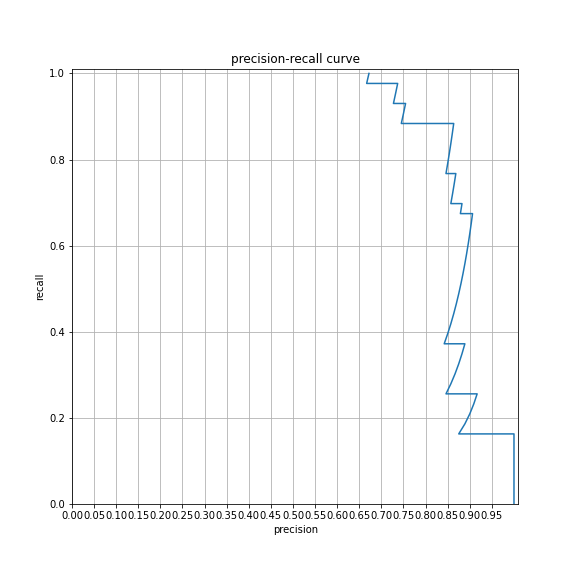

In [45]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_test,y_decision)
plt.figure(figsize=(8,8))
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot(precision,recall)
plt.title('precision-recall curve')
plt.xlabel('precision')
plt.xticks([i/20 for i in range(20)])
plt.grid()
plt.ylabel('recall')
plt.show()

0.8996057368150392
0.9897720130278269


<IPython.core.display.Javascript object>


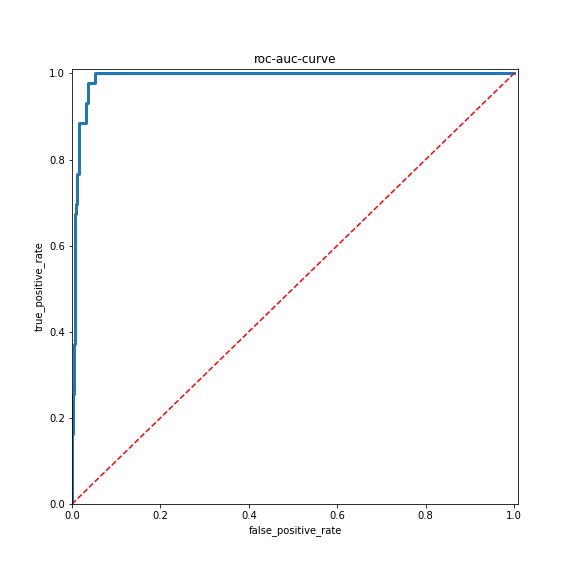

In [47]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# false_positive_rate,tru_positive_rate
print(roc_auc_score(y_test,pred))
# print(auc(y_test,pred))
fpr,tpr,threshold=roc_curve(y_test,y_decision)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure(figsize=(8,8))
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.title('roc-auc-curve')
plt.plot(fpr,tpr,lw=3)
#lw=linewidth
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

# GRIDSEARCHCV

In [74]:
from sklearn.model_selection import GridSearchCV
clf=SVC(kernel='rbf')
grid_values={'gamma':[0.001,0.01,0.1,1,10]}
grid_clf=GridSearchCV(clf,param_grid=grid_values,scoring='roc_auc')
grid_clf.fit(X_train,y_train)
grid_decision=grid_clf.decision_function(X_test)
print('roc_auc score:', grid_clf.score(X_test,y_test))
print('best_param ',grid_clf.best_params_)
print('best_score: ',grid_clf.best_score_)

roc_auc score: 0.99982858122393
best_param  {'gamma': 0.001}
best_score:  0.9998744712115729


# **MULTI-CLASS**

In [18]:
X_train_multi,X_test_multi,y_train_multi,y_test_multi=train_test_split(X,y,random_state=0)

accuracy :  0.84


<IPython.core.display.Javascript object>


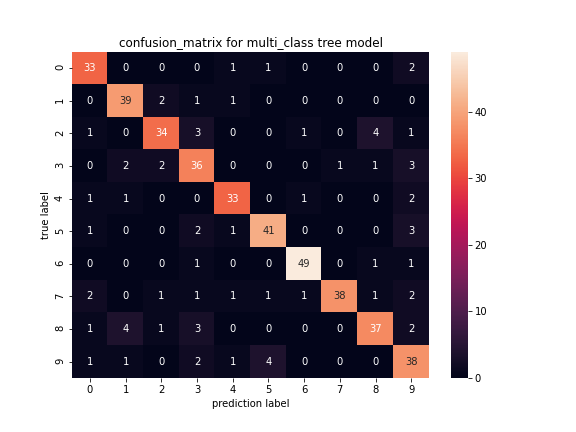

In [19]:
tree_model_multi=DecisionTreeClassifier()
tree_model_multi.fit(X_train_multi,y_train_multi)
tree_pred_multi=tree_model_multi.predict(X_test_multi)
print("accuracy : ",tree_model_multi.score(X_test_multi,y_test_multi))
confusion_matrix_multi=confusion_matrix(y_test_multi,tree_pred_multi)
df_matrix_multi=pd.DataFrame(confusion_matrix_multi,index=[i for i in range(10)],columns=[i for i in range(10)])
plt.figure(figsize=(8,6))
sns.heatmap(df_matrix_multi,annot=True)
plt.title('confusion_matrix for multi_class tree model')
plt.xlabel('prediction label')
plt.ylabel('true label')
plt.show()

accuracy :  0.9711111111111111


<IPython.core.display.Javascript object>


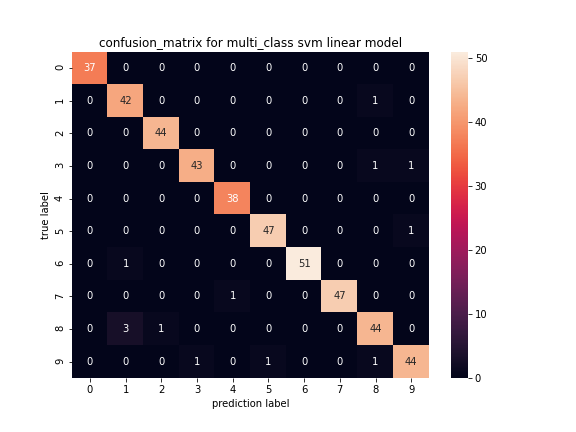

In [20]:
svm_linear_model_multi=SVC(kernel='linear')
svm_linear_model_multi.fit(X_train_multi,y_train_multi)
pred_multi=svm_linear_model_multi.predict(X_test_multi)
print("accuracy : ",svm_linear_model_multi.score(X_test_multi,y_test_multi))
confusion_matrix_multi=confusion_matrix(y_test_multi,pred_multi)
df_matrix_multi=pd.DataFrame(confusion_matrix_multi,index=[i for i in range(10)],columns=[i for i in range(10)])
plt.figure(figsize=(8,6))
sns.heatmap(df_matrix_multi,annot=True)
plt.title('confusion_matrix for multi_class svm linear model')
plt.xlabel('prediction label')
plt.ylabel('true label')
plt.show()

accuracy :  0.9911111111111112


<IPython.core.display.Javascript object>


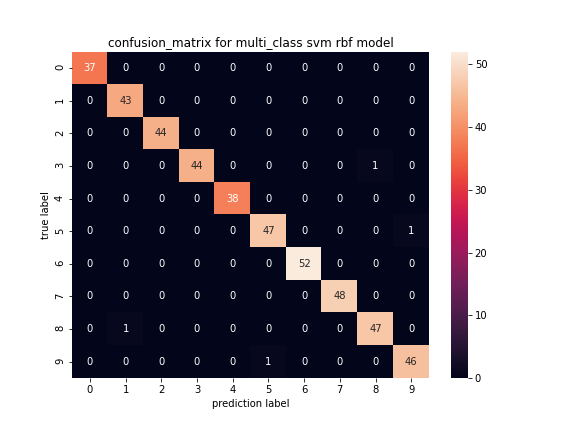

In [21]:
svm_rbf_model_multi=SVC(kernel='rbf')
svm_rbf_model_multi.fit(X_train_multi,y_train_multi)
rbf_pred_multi=svm_rbf_model_multi.predict(X_test_multi)
print("accuracy : ",svm_rbf_model_multi.score(X_test_multi,y_test_multi))
confusion_matrix_multi=confusion_matrix(y_test_multi,rbf_pred_multi)
df_matrix_multi=pd.DataFrame(confusion_matrix_multi,index=[i for i in range(10)],columns=[i for i in range(10)])
plt.figure(figsize=(8,6))
sns.heatmap(df_matrix_multi,annot=True)
plt.title('confusion_matrix for multi_class svm rbf model')
plt.xlabel('prediction label')
plt.ylabel('true label')
plt.show()

In [22]:
print('classification report of svm model kernal = rbf')
print('-'*100)
print(classification_report(y_test_multi,rbf_pred_multi))

classification report of svm model kernal = rbf
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



**MICRO AND MACRO AVERAGE PRECISION **
1. MICRO PRECISION USED TO CHECK WETHER FREQUENT CLASS PREDICTED CORRECTLY
2. MACRO PRECISION USED TO CHECK WEHTER NON-FREQUENT CLASS PREDICTED CORRECTLY 

In [23]:
# average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')
print('tree model macro-average precision--------')
print(precision_score(y_test_multi,tree_pred_multi,average='macro'))
print('tree model micro-average precision--------')
print(precision_score(y_test_multi,tree_pred_multi,average='micro'))

tree model macro-average precision--------
0.8441522051036529
tree model micro-average precision--------
0.84


In [24]:
# average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')
print('rbf model macro-average precision--------')
print(precision_score(y_test_multi,rbf_pred_multi,average='macro'))
print('rbf model micro-average precision--------')
print(precision_score(y_test_multi,rbf_pred_multi,average='micro'))

rbf model macro-average precision--------
0.991432946486138
rbf model micro-average precision--------
0.9911111111111112


cross val score

In [25]:
from sklearn.model_selection import cross_val_score
print('cross_val_score : ',cross_val_score(svm_rbf_model_multi,X,y,cv=5))

cross_val_score :  [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]


# Regression Evalutation

In [26]:
from sklearn.datasets import load_diabetes
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
diabetes=load_diabetes()

In [27]:
X=diabetes.data[:,None,6]
y=diabetes.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
dummy_model=DummyRegressor(strategy='mean')
dummy_model.fit(X_train,y_train)
linear_pred=linear_model.predict(X_test)
dummy_pred=dummy_model.predict(X_test)
print('r2 score')
print('-'*100)
print('dummy ',r2_score(y_test,dummy_pred))
print('linear ',r2_score(y_test,linear_pred))
print()
print('mean_squared_error ')
print('-'*100)
print('dummy ',mean_squared_error(y_test,dummy_pred))
print('linear ',mean_squared_error(y_test,linear_pred))


r2 score
----------------------------------------------------------------------------------------------------
dummy  -0.00014359578276068596
linear  0.06399006639614913

mean_squared_error 
----------------------------------------------------------------------------------------------------
dummy  4965.126471649221
linear  4646.740446731375


<IPython.core.display.Javascript object>


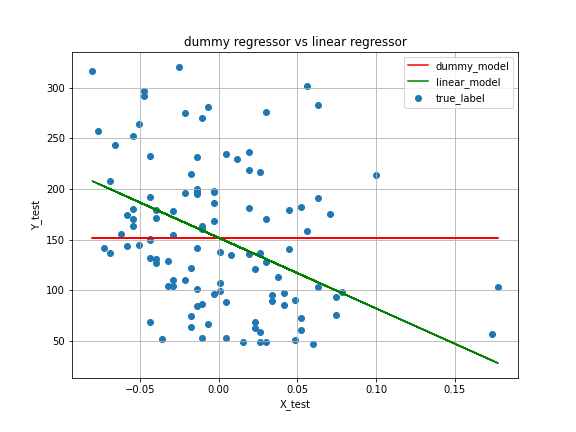

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,label='true_label')
plt.plot(X_test,dummy_pred,'r-',label="dummy_model")
plt.plot(X_test,linear_pred,'g-',label="linear_model")
plt.legend(loc='best')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.title('dummy regressor vs linear regressor')
plt.grid()
plt.show()

# SCORING=' ...  '     PARAMETER LIST

In [72]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
